# Results Notebook Deep Q-Learning Project (MHBF)

In [169]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def sliding_mean(data, size_window):
    window = np.ones(size_window) / size_window
    return np.convolve(data, window, mode='valid')

def read_files_same_params(folder):
    suffixes = ['baseline', 'rb', 'tn', 'lf', 'prb']
    results = []
    for suf in suffixes:
        result = torch.load(f'{folder}/results_{suf}.pth')
        results.append(result)
    return results[0], results[1], results[2], results[3], results[4]
        
folder = 'results_linear/params_baseline' #'results_grid'

baseline_results, rb_results, tn_results, lf_results, prb_results \
= read_files_same_params(folder)
# params, weights, step_game, rewards_test, rewards_train, loss

SLIDING_WINDOW = 25

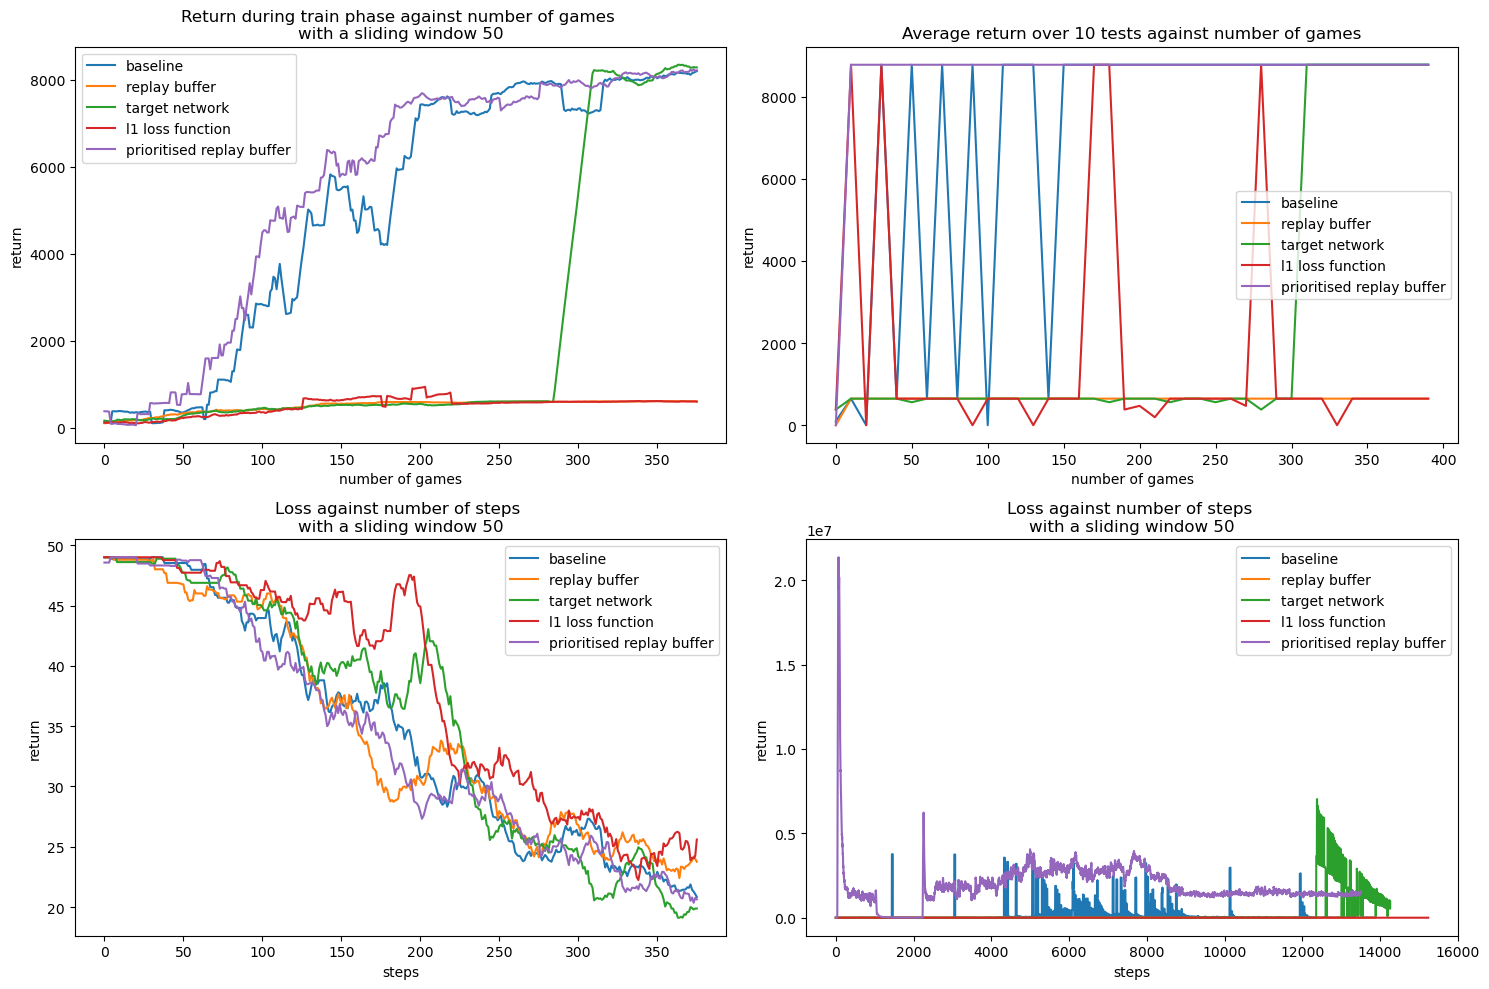

In [171]:
fig, axs = plt.subplots(2, 2, figsize = (15, 10))

#PLOTTING REWARDS TRAININING
axs[0][0].plot(sliding_mean(baseline_results["rewards_train"], SLIDING_WINDOW),
           label = "baseline")
axs[0][0].plot(sliding_mean(rb_results["rewards_train"], SLIDING_WINDOW),
           label = "replay buffer")
axs[0][0].plot(sliding_mean(tn_results["rewards_train"], SLIDING_WINDOW),
           label = "target network")
axs[0][0].plot(sliding_mean(lf_results["rewards_train"], SLIDING_WINDOW),
           label = "l1 loss function")
axs[0][0].plot(sliding_mean(prb_results["rewards_train"], SLIDING_WINDOW),
           label = "prioritised replay buffer")
axs[0][0].legend()
axs[0][0].set_title("Return during train phase against number of games \nwith a sliding window 50")
axs[0][0].set_xlabel("number of games")
axs[0][0].set_ylabel("return")

#PLOTTING REWARDS TESTING
axs[0][1].plot([10 * i for i in range(int(baseline_results["params"]['n_game']/10))],
            baseline_results["rewards_test"],
            label = "baseline")
axs[0][1].plot([10 * i for i in range(int(rb_results["params"]['n_game']/10))],
            rb_results["rewards_test"],
            label = "replay buffer")
axs[0][1].plot([10 * i for i in range(int(tn_results["params"]['n_game']/10))],
            tn_results["rewards_test"],
            label = "target network")
axs[0][1].plot([10 * i for i in range(int(lf_results["params"]['n_game']/10))],
            lf_results["rewards_test"],
            label = "l1 loss function")
axs[0][1].plot([10 * i for i in range(int(prb_results["params"]['n_game']/10))],
            prb_results["rewards_test"],
            label = "prioritised replay buffer")
axs[0][1].legend()
axs[0][1].set_title("Average return over 10 tests against number of games")
axs[0][1].set_xlabel("number of games")
axs[0][1].set_ylabel("return")

#PLOTTING STEP PER GAME
axs[1][0].plot(sliding_mean(baseline_results["step_game"], SLIDING_WINDOW),
            label = "baseline")
axs[1][0].plot(sliding_mean(rb_results["step_game"], SLIDING_WINDOW),
            label = "replay buffer")
axs[1][0].plot(sliding_mean(tn_results["step_game"], SLIDING_WINDOW),
            label = "target network")
axs[1][0].plot(sliding_mean(lf_results["step_game"], SLIDING_WINDOW),
            label = "l1 loss function")
axs[1][0].plot(sliding_mean(prb_results["step_game"], SLIDING_WINDOW),
            label = "prioritised replay buffer")
axs[1][0].legend()
axs[1][0].set_title("Loss against number of steps \nwith a sliding window 50")
axs[1][0].set_xlabel("steps")
axs[1][0].set_ylabel("return")

#PLOTTING LOSS
axs[1][1].plot(sliding_mean(baseline_results["loss"], SLIDING_WINDOW),
            label = "baseline")
axs[1][1].plot(sliding_mean(rb_results["loss"], SLIDING_WINDOW),
            label = "replay buffer")
axs[1][1].plot(sliding_mean(tn_results["loss"], SLIDING_WINDOW),
            label = "target network")
axs[1][1].plot(sliding_mean(lf_results["loss"], SLIDING_WINDOW),
            label = "l1 loss function")
axs[1][1].plot(sliding_mean(prb_results["loss"], SLIDING_WINDOW),
            label = "prioritised replay buffer")
axs[1][1].legend()
axs[1][1].set_title("Loss against number of steps \nwith a sliding window 50")
axs[1][1].set_xlabel("steps")
axs[1][1].set_ylabel("return")

plt.tight_layout()
plt.show()
    